In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/bhl

Mounted at /gdrive
/gdrive/MyDrive/bhl


In [15]:
def load_data(path, X_column_filter = None):
  import os
  import pandas as pd

  train_path = os.path.join(path, 'train.csv')
  test_path = os.path.join(path, 'test.csv')
  train = pd.read_csv(train_path)
  test = pd.read_csv(test_path)

  cols_to_drop = ['subject'] # ['void()', 'subject']
  train = train.drop(cols_to_drop, axis = 1)
  test = test.drop(cols_to_drop, axis = 1)

  target = 'Activity' #'void()'
  # col_activ = 'Activity'
  # target_id = 'Activity_id'
  # activities = train[col_activ].unique()
  # activ_dict = dict(zip(activities, range(len(activities))))
  # train[target_id] = train[col_activ].map(activ_dict)
  # test[target_id] = test[col_activ].map(activ_dict)
  # test = test.drop(col_activ, axis = 1)
  # train = train.drop(col_activ, axis = 1)

  # train = train[train[target].notna()]
  # test = test[test[target].notna()]
  # train[target] = train[target].astype('int')
  # test[target] = test[target].astype('int')
  
  train_x, train_y = train.drop(target, axis = 1), train[target]
  test_x, test_y = test.drop(target, axis = 1), test[target]

  if X_column_filter:
    train_x = train_x[X_column_filter]
    test_x = test_x[X_column_filter]

  return train_x, train_y.values.ravel(), test_x, test_y.values.ravel()

In [18]:
def train_xgboost(path, X_column_filter = None):
  from sklearn.metrics import accuracy_score, classification_report
  import xgboost as xgb

  train_x, train_y, test_x, test_y = load_data(path, X_column_filter)

  model = xgb.XGBClassifier()
  model.fit(train_x, train_y)

  y_pred = model.predict(test_x)

  print(f'Using {path} data, model has {accuracy_score(test_y, y_pred)} acc')

  return model, y_pred, test_y

In [4]:
model, y_pred, test_y = train_xgboost('./unbalanced_raw')

Using ./unbalanced_raw data, model has 0.9776422764227642 acc


In [5]:
importances = model.get_booster().get_score(importance_type='gain')
importances_sorted = sorted([(k,v) for k,v in importances.items()], key = lambda x: x[1])


In [22]:
top50 = [x[0] for x in importances_sorted[-50:]]

In [48]:
# tried predicting void()
model, y_pred, test_y = train_xgboost('./unbalanced_raw')

Using ./unbalanced_raw data, model has 0.28760162601626016 acc


In [23]:
model, y_pred, test_y = train_xgboost('./unbalanced_raw', top50)

Using ./unbalanced_raw data, model has 0.9522357723577236 acc


In [50]:
def plot_cm(test_y, y_pred):
  import numpy as np
  import seaborn as sns
  import pandas as pd
  from sklearn import metrics
  labels = sorted(np.unique(test_y))
  cm = metrics.confusion_matrix(test_y, y_pred)
  df = pd.DataFrame(cm, index = labels, columns = labels)
  ax = sns.heatmap(df, annot=True, fmt='d')
  ax.set_title('Confusion matrix')
  ax.set_xlabel('True label')
  ax.set_ylabel('Prediction')
  return ax


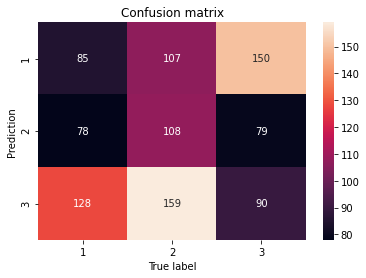

In [51]:
plot_cm(y_pred, test_y)

In [ ]:
train_xgboost('./unbalanced_raw')
train_xgboost('./unbalanced')
train_xgboost('./balanced')
x = 1